
Using KMeans for Outlier Detection
==============================

We'll look at both the debate and mechanics of
KMeans for outlier detection. It can be useful to isolate some types
of errors, but care should be taken when using it.

### Removal of Outliers
- In this section, we'll use KMeans to do outlier detections on a
cluster of points.
- It's important to note that there are many schools of thought
when it comes to outliers and outlier detection. 
- On one hand,
we're potentially removing points that were generated by the
data-generating process by removing outliers.
- On the other hand, outliers can be due to a measurement error
or some other outside factor.
- This is the most credence we'll give to the debate; the rest of this
recipe is about finding outliers; we'll work under the assumption
that our choice to remove outliers is justified.
- The act of outlier detection is a matter of finding the centroids
of the clusters, and then identifying points that are potential
outliers by their distances from the centroid.

### Generating a Data Set
First, we'll generate a single blob of 100 points, and then we'll iden-
tify the 5 points that are furthest from the centroid. These are the
potential outliers:



In [16]:
from sklearn.datasets import make_blobs
X, labels = make_blobs(100, centers=1)
import numpy as np
import matplotlib as plt
% matplotlib inline


It's important that the KMeans cluster has a single center. This
idea is similar to a one-class SVM that is used for outlier detection:

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Now, let's look at the plot. For those playing along at home, try
to guess which points will be identifued as one of the five outliers:

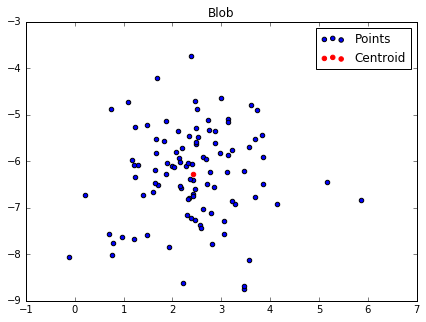

In [18]:
f, ax = plt.pyplot.subplots(figsize=(7, 5))
ax.set_title("Blob")
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],label='Centroid',color='r')
ax.legend()

The following is the output: Now, let's identify the five closest points:

In [19]:
distances = kmeans.transform(X)
# argsort returns an array of indexes which will sort the array in ascending order
# so we reverse it via [::-1] and take the top five with [:5]
sorted_idx = np.argsort(distances.ravel())[::-1][:5]


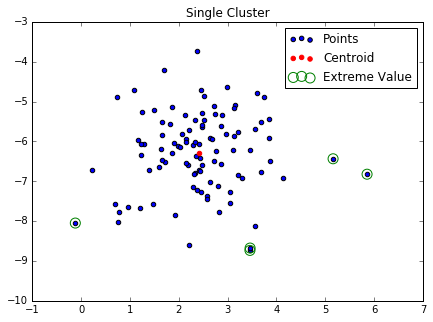

In [20]:
# Now, let's see which plots are the farthest away:
f, ax = plt.pyplot.subplots(figsize=(7, 5))
ax.set_title("Single Cluster")
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],label='Centroid', color='r')
ax.scatter(X[sorted_idx][:, 0], X[sorted_idx][:, 1],label='Extreme Value', edgecolors='g',facecolors='none', s=100)
ax.legend(loc='best')

The following is the output: It's easy to remove these points if we
like:

In [21]:

new_X = np.delete(X, sorted_idx, axis=0)

Also, the centroid clearly changes with the removal of these points:

In [22]:
new_kmeans = KMeans(n_clusters=1)
new_kmeans.fit(new_X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


Let's visualize the difference between the old and new centroids:



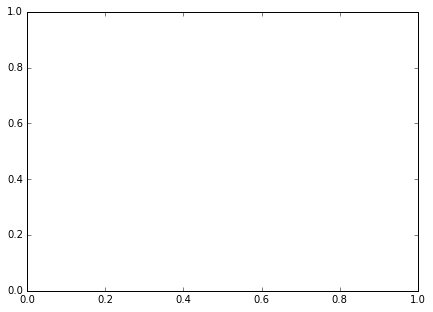

In [25]:
#import matplotlib.pyplot as plt
#plt.figure
#f, ax = plt.pyplot.figure(figsize=(7, 5))
f, ax = plt.pyplot.subplots(figsize=(7, 5))

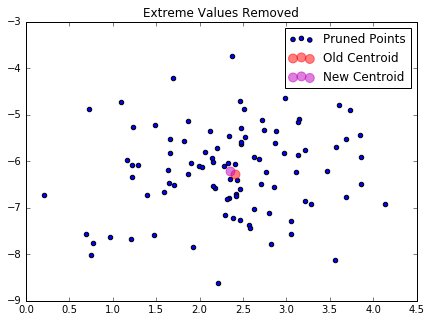

In [26]:
f, ax = plt.pyplot.subplots(figsize=(7, 5))
ax.set_title("Extreme Values Removed")
ax.scatter(new_X[:, 0], new_X[:, 1],label='Pruned Points')
ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],label='Old Centroid',color='r', s=80, alpha=.5)
ax.scatter(new_kmeans.cluster_centers_[:, 0],new_kmeans.cluster_centers_[:, 1],label='New Centroid',color='m', s=80, alpha=.5)
ax.legend(loc='best')


The following is the output: Clearly, the centroid hasn't moved
much, which is to be expected when only removing the ve most
extreme values. This process can be repeated until we're satised
that the data is representative of the process.


### Gaussian Distribution
As we've already seen, there is a fundamental connection between the Gaussian distribution and the KMeans clustering. 

Let's create an empirical Gaussian based of the centroid and sample covariance matrix and look at the probability of each point theoretically, the five points we removed. This just shows that we have in fact removed the values with the least likelihood. This idea between distances and
likelihoods is very important, and will come around quite often in
your machine learning training. 

Use the following command to create an empirical Gaussian:

In [15]:

from scipy import stats
emp_dist = stats.multivariate_normal(kmeans.cluster_centers_.ravel())
lowest_prob_idx = np.argsort(emp_dist.pdf(X))[:5]
np.all(X[sorted_idx] == X[lowest_prob_idx])


True